<a href="https://colab.research.google.com/github/HackerJacky/Crypto-quantitative-analysis/blob/main/crypto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
 pip install pyfolio-reloaded

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 23.1 MB/s eta 0:00:00


In [3]:
pip install alphalens-reloaded

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 33.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.9 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.3-py3-none-any.whl size=138487 sha256=b8652a8d2d5be338648b74dd6847118446e2b030696d07bbe243eb51604ae647
  Stored in directory: /root/.cache/pip/wheels/39/c7/dd/909d267742f7fbb941ff081dacd661f622a0b4eb38f667b84b
Successfully built peewee
  Attempting uninstall: peewee
    Found existing installation: peewee 3.18.3
    Uninstalling peewee-3.18.3:
      Successfully uninstalled peewee-3.18.3


In [2]:
pip install "git+https://github.com/tidy-finance/py-fmpapi"

  Cloning https://github.com/tidy-finance/py-fmpapi to /tmp/pip-req-build-kjwnj1gc
  Running command git clone --filter=blob:none --quiet https://github.com/tidy-finance/py-fmpapi /tmp/pip-req-build-kjwnj1gc
  Resolved https://github.com/tidy-finance/py-fmpapi to commit 353fd1a134d34a021a403e1d4ce283c3046bde8a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for fmpapi: filename=fmpapi-1.0.0-py3-none-any.whl size=8220 sha256=502eeb949b4bc5e602a390ff073145657c1c5d7fb35363daaeed5ca459687c38
  Stored in directory: /tmp/pip-ephem-wheel-cache-4tqluyri/wheels/bc/c0/57/a68aa930336442d4b81e59a225a0d498e525711988ed2092a7
Successfully built fmpapi


In [8]:
pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 20.0 MB/s eta 0:00:00


In [41]:
import pandas as pd
import numpy as np
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.tsa.stattools import adfuller
import os
from matplotlib.font_manager import FontProperties
warnings.filterwarnings('ignore')

#載入資料

In [19]:
start='2020-01-01'
end='2025-11-20'
#Bitcoin closed price
BTC = yf.download('BTC-USD', start=start, end=end)['Close'].ffill().dropna()
#Micorstrategy closed price
Micro = yf.download('MSTR', start=start, end=end)['Close'].ffill().dropna()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


#針對Microstrategy和Bitcoin做股價疊圖


In [51]:
from matplotlib.font_manager import FontManager
import subprocess

mpl_fonts = set(f.name for f in FontManager().ttflist)

print('all font list get from matplotlib.font_manager:')
for f in sorted(mpl_fonts):
    print('\t' + f)

all font list get from matplotlib.font_manager:
	DejaVu Sans
	DejaVu Sans Display
	DejaVu Sans Mono
	DejaVu Serif
	DejaVu Serif Display
	Humor Sans
	Liberation Mono
	Liberation Sans
	Liberation Sans Narrow
	Liberation Serif
	Noto Sans CJK JP
	Noto Serif CJK JP
	STIXGeneral
	STIXNonUnicode
	STIXSizeFiveSym
	STIXSizeFourSym
	STIXSizeOneSym
	STIXSizeThreeSym
	STIXSizeTwoSym
	cmb10
	cmex10
	cmmi10
	cmr10
	cmss10
	cmsy10
	cmtt10


In [60]:
import matplotlib.font_manager as fm
for f in fm.findSystemFonts():
    if "Noto Sans CJK JP" in f:
        print(f)

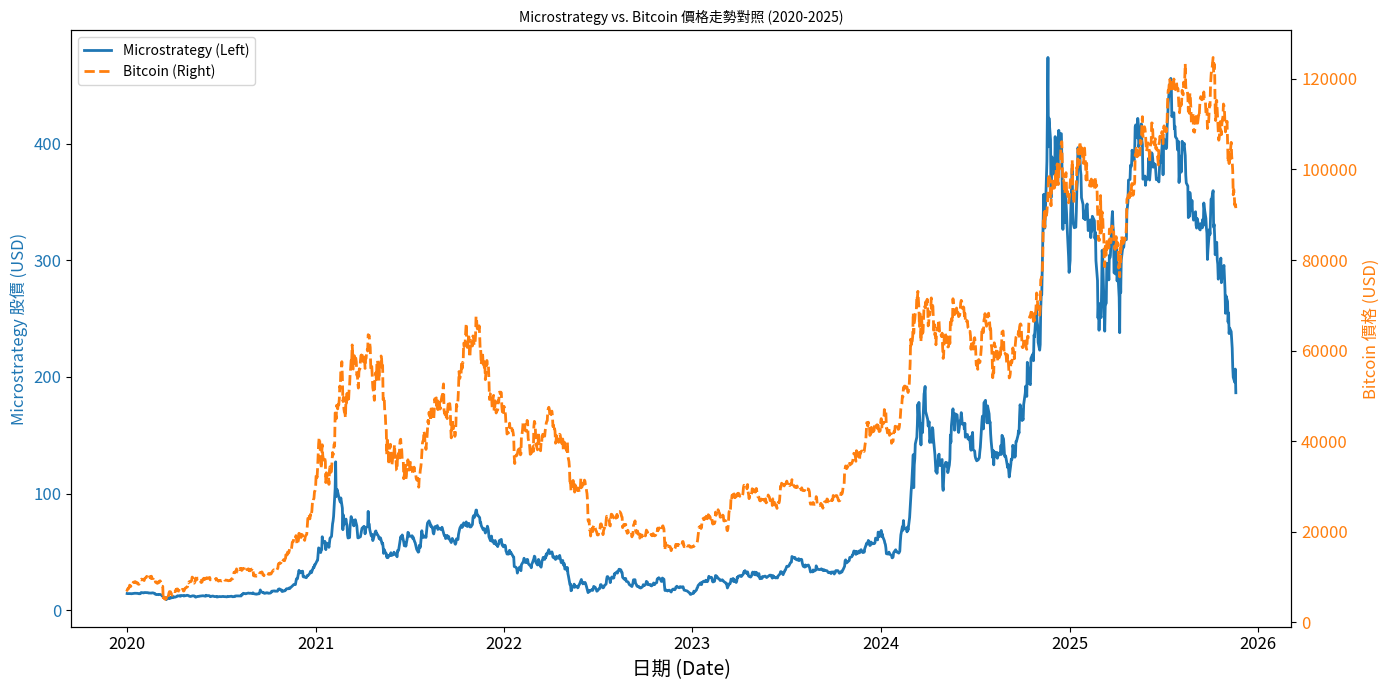

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [73]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from google.colab import files

# ----------------------------------------------------
# 1. 字型設定（Colab 版）
# ----------------------------------------------------
font_path = "/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc"
myfont = FontProperties(fname=font_path)
plt.rcParams['axes.unicode_minus'] = False

# ----------------------------------------------------
# 2. 畫圖
# ----------------------------------------------------
fig, ax1 = plt.subplots(figsize=(14, 7))

# 左軸：MSTR
color_mstr = 'tab:blue'
ax1.set_xlabel('日期 (Date)', fontproperties=myfont, fontsize=14)
ax1.set_ylabel('Microstrategy 股價 (USD)',
               color=color_mstr, fontproperties=myfont, fontsize=12)

line1 = ax1.plot(Micro.index, Micro['MSTR'], color=color_mstr,
                 label='Microstrategy (Left)', linewidth=2)

ax1.tick_params(axis='y', labelcolor=color_mstr)

# 右軸：BTC
ax2 = ax1.twinx()
color_btc = 'tab:orange'
ax2.set_ylabel('Bitcoin 價格 (USD)',
               color=color_btc, fontsize=12, fontproperties=myfont)

line2 = ax2.plot(BTC.index, BTC['BTC-USD'], color=color_btc,
                 label='Bitcoin (Right)', linewidth=2, linestyle='--')

ax2.tick_params(axis='y', labelcolor=color_btc)

# ----------------------------------------------------
# 3. 套用字體到所有刻度 tick labels
# ----------------------------------------------------
for label in ax1.get_xticklabels() + ax1.get_yticklabels():
    label.set_fontproperties(myfont)
    label.set_fontsize(12)

for label in ax2.get_yticklabels():
    label.set_fontproperties(myfont)
    label.set_fontsize(12)

# ----------------------------------------------------
# 4. 圖例 legend 套用中文字體
# ----------------------------------------------------
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left',
           fontsize=12, prop=myfont)

# ----------------------------------------------------
# 5. 標題
# ----------------------------------------------------
plt.title('Microstrategy vs. Bitcoin 價格走勢對照 (2020-2025)',
          fontsize=28, fontweight='bold', fontproperties=myfont)

fig.tight_layout()

# ----------------------------------------------------
# 6. 匯出 + 下載（Colab 專用）
# ----------------------------------------------------
filename = "price_trend_comparison.png"
plt.savefig(filename, dpi=300)
plt.show()

files.download(filename)


#做定態檢定


In [17]:
try:
    from arch.unitroot import PhillipsPerron
    HAS_ARCH = True
except ImportError:
    HAS_ARCH = False
    print("警告: 未安裝 'arch' 套件，將跳過 PP 檢定。建議執行: pip install arch")

# 1. 下載資料
def get_data():
    print("正在下載資料...")
    tickers = ['MSTR', 'BTC-USD']
    data = yf.download(tickers, start='2020-01-01', end='2024-11-25')['Close']
    data = data.ffill().dropna()
    return data

# 2. ADF 檢定函數
def run_adf_test(series, name):
    result = adfuller(series)
    print(f"  [ADF] {name} - Stat: {result[0]:.4f}, P-value: {result[1]:.4f}")
    return result[0], result[1]

# 3. PP 檢定函數
def run_pp_test(series, name):
    if not HAS_ARCH:
        return np.nan, np.nan

    # PhillipsPerron 默認使用 'c' (constant, 含截距項)，這符合一般金融價格檢定
    pp = PhillipsPerron(series)
    print(f"  [PP ] {name} - Stat: {pp.stat:.4f}, P-value: {pp.pvalue:.4f}")
    return pp.stat, pp.pvalue

# 主程式
if __name__ == "__main__":
    df = get_data()

    # 計算對數報酬率
    df_log_ret = np.log(df / df.shift(1)).dropna()

    print("\n=== 開始進行定態檢定 (Stationarity Tests) ===")
    print("說明：若 P-value < 0.05，代表資料平穩 (Stationary)，拒絕虛無假設。\n")

    results = []

    # 定義要檢定的項目
    targets = [
        ('MSTR (Level)', df['MSTR']),
        ('MSTR (Return)', df_log_ret['MSTR']),
        ('BTC (Level)', df['BTC-USD']),
        ('BTC (Return)', df_log_ret['BTC-USD'])
    ]

    for label, series in targets:
        print(f"--- 分析: {label} ---")
        adf_stat, adf_p = run_adf_test(series, label)
        pp_stat, pp_p = run_pp_test(series, label)

        # 儲存結果以便查看 (可以用來填入 LaTeX)
        results.append({
            'Variable': label,
            'ADF Stat': adf_stat,
            'ADF P-val': adf_p,
            'PP Stat': pp_stat,
            'PP P-val': pp_p
        })

    print("\n=== 彙整結果表格 (可填入論文) ===")
    print(f"{'變數':<20} | {'ADF Stat':<10} | {'ADF P-val':<10} | {'PP Stat':<10} | {'PP P-val':<10}")
    print("-" * 70)
    for r in results:
        # 判斷星號
        adf_star = "***" if r['ADF P-val'] < 0.01 else "**" if r['ADF P-val'] < 0.05 else "*" if r['ADF P-val'] < 0.1 else ""
        pp_star = "***" if r['PP P-val'] < 0.01 else "**" if r['PP P-val'] < 0.05 else "*" if r['PP P-val'] < 0.1 else "" if not np.isnan(r['PP P-val']) else ""

        pp_stat_str = f"{r['PP Stat']:.4f}" if not np.isnan(r['PP Stat']) else "N/A"

        print(f"{r['Variable']:<20} | {r['ADF Stat']:.4f}{adf_star:<3} | {r['ADF P-val']:.4f}     | {pp_stat_str}{pp_star:<3} | {r['PP P-val']:.4f}")

    print("\n註: *** p<0.01, ** p<0.05, * p<0.1")

[*********************100%***********************]  2 of 2 completed

正在下載資料...

=== 開始進行定態檢定 (Stationarity Tests) ===
說明：若 P-value < 0.05，代表資料平穩 (Stationary)，拒絕虛無假設。

--- 分析: MSTR (Level) ---


  [ADF] MSTR (Level) - Stat: 2.8877, P-value: 1.0000
  [PP ] MSTR (Level) - Stat: 4.1583, P-value: 1.0000
--- 分析: MSTR (Return) ---
  [ADF] MSTR (Return) - Stat: -43.1977, P-value: 0.0000
  [PP ] MSTR (Return) - Stat: -43.2909, P-value: 0.0000
--- 分析: BTC (Level) ---
  [ADF] BTC (Level) - Stat: -0.2145, P-value: 0.9368
  [PP ] BTC (Level) - Stat: -0.0568, P-value: 0.9536
--- 分析: BTC (Return) ---
  [ADF] BTC (Return) - Stat: -13.7663, P-value: 0.0000
  [PP ] BTC (Return) - Stat: -44.6413, P-value: 0.0000

=== 彙整結果表格 (可填入論文) ===
變數                   | ADF Stat   | ADF P-val  | PP Stat    | PP P-val  
----------------------------------------------------------------------
MSTR (Level)         | 2.8877    | 1.0000     | 4.1583    | 1.0000
MSTR (Return)        | -43.1977*** | 0.0000     | -43.2909*** | 0.0000
BTC (Level)          | -0.2145    | 0.9368     | -0.0568    | 0.9536
BTC (Return)         | -13.7663*** | 0.0000     | -44.6413*** | 0.0000

註: *** p<0.01, ** p<0.05, * p<0.1
